In [1]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
#df_CDFS = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Jupyter Notebooks\Report 10-19-23\df_AlConCD554.csv")

df_CDFS1 = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\3 - EF - Feature Selection\df_CDFI.csv")
# df_CDFS = pd.read_csv('/workspaces/codespaces-jupyter/Final Machine/Interpolated LIMS/df_CDOH.csv')


In [3]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [4]:
df_CDFS1.describe()

,Butanol,425 %Al,DI55102,DI55152,TC55552,FC55569,AYC55580,FC55576,FC42428,FC55003,DI55580,FFC55553,FC55009,TI55023,LC55557,LC55555,TI55017,LC55553,FC55555,TI55021,FC55102,FFC55555,FYC55553,FC55552,TC55553,FC55152,TC55555,TI55013,LC55568,TI55014,TI55015,TI55016,Decanol
count,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,5.669200e+04,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000
mean,10.159097,6.102568,0.929183,0.948213,167.848708,6542.683482,11.190763,423.616848,34949.282507,5943.587725,0.998448,0.983235,8.642095e+02,218.923414,69.335227,59.583652,186.704144,63.743198,27838.228893,223.571121,44454.232553,0.774375,35311.748813,35943.898723,182.968327,40322.298418,181.033535,202.065783,40.721731,198.001684,195.621123,190.901237,2.783139
std,10.766912,0.307167,0.066439,0.043248,15.014702,380.329468,4.140405,260.435270,5665.289174,836.963231,0.044181,0.056070,5.951287e+02,4.063504,3.271572,10.709861,9.778964,6.403442,3535.683915,9.366356,6565.359850,0.021944,4632.175030,4437.551046,27.965747,5678.432470,1.495460,17.610521,1.660907,13.633101,13.590375,9.102679,1.600426
min,0.010000,4.573810,0.794535,0.820425,119.869000,5096.080000,0.000862,0.000548,14573.800000,2925.430000,0.860904,0.265390,3.150000e-18,206.472000,59.038000,27.970000,159.702000,43.548000,14214.900000,206.365000,20039.100000,0.694477,17321.200000,18590.000000,110.534000,19146.400000,175.746000,152.818000,31.616100,161.810000,158.581000,164.278000,0.000976
25%,3.725195,5.969493,0.889793,0.917749,156.235000,6295.522500,9.382740,244.604000,31670.025000,5425.580000,0.967603,0.959998,4.091148e+02,215.731000,66.227375,49.938100,179.370000,61.246825,26770.325000,217.963000,40968.975000,0.759903,33117.150000,34869.500000,162.691750,38155.075000,179.971000,187.962000,40.100000,187.148750,184.999750,183.515750,1.493330
50%,5.920780,6.120565,0.938533,0.942326,170.625000,6529.010000,10.709550,379.134000,37037.650000,5963.340000,0.995945,0.988710,8.416325e+02,218.255500,69.966300,61.884700,185.770500,65.277550,28947.000000,221.217000,45941.200000,0.778141,36832.650000,37688.050000,177.601500,41440.150000,180.142000,200.253500,41.081550,196.757000,194.396000,189.936000,2.560000
75%,11.642100,6.267622,0.979955,0.974824,179.313000,6767.337500,12.928750,617.744000,39151.750000,6506.837500,1.027960,1.010652,1.317453e+03,221.765000,71.768800,68.106400,193.388250,67.964225,30036.300000,225.275000,48822.325000,0.789695,38552.225000,38952.225000,202.014250,43872.400000,182.027000,214.675250,41.480300,207.498250,205.106500,197.160250,3.863330
max,60.346700,7.571230,1.068230,1.065410,207.426000,8014.950000,23.835600,1206.820000,49372.900000,8973.580000,1.125220,1.475490,2.655410e+03,232.208000,79.508200,85.261600,212.051000,82.753500,34638.100000,260.685000,62848.200000,0.853283,50427.700000,46356.900000,261.360000,58808.700000,186.453000,250.439000,49.295100,234.651000,233.318000,216.644000,7.923330


In [5]:
column_counts = df_CDFS1.columns.value_counts()
total_counts = column_counts.sum()
print(total_counts)

34


In [6]:

# List of columns to exclude to run XGboost feature selection
exclude_columns = ["Date", "Decanol"]

# Temporarily save the excluded columns
temp_exclude = df_CDFS1[exclude_columns]

# Create a new DataFrame without the excluded columnsd
df_CDFS = df_CDFS1.drop(columns=exclude_columns)



In [7]:
# # List of columns to exclude
# columns_to_exclude = [
#     'FC52018_1dAvg', 'FC55003_1dAvg', 'FC55009_1dAvg', 'FC55102_1dAvg',
#     'FC55152_1dAvg', 'FC55552_1dAvg', 'FC55569_1dAvg', 'FC55576_1dAvg',
#     'FFC55553_1dAvg', 'FFC55555_1dAvg', 'FYC55553_1dAvg', 'LC52572_1dAvg',
#     'LC55553_1dAvg', 'LC55555_1dAvg', 'LC55557_1dAvg', 'LC55568_1dAvg',
#     'LC90366_1dAvg', 'LC90368_1dAvg', 'TC52015_1dAvg', 'TC55552_1dAvg',
#     'TC55553_1dAvg', 'TC55555_1dAvg', 'TC55566_1dAvg', 'TI40050_1dAvg',
#     'PI55004_1dAvg', 'PI55020_1dAvg', 'TI52014_1dAvg', 'VI52558B_1dAvg',
#     'PI55004', 'PI55020', 'PI55560', 'TI40050', 'FC55009'
# ]

# # Filter columns based on exclusion list
# columns_to_include = [col for col in df_CDFS_noStr.columns if col not in columns_to_exclude]

# # Create a new DataFrame with included columns
# df_CDFS_noAvg = df_CDFS_noStr[columns_to_include]

# # Print descriptive statistics for df_CDFS
# print(df_CDFS_noAvg.describe())



In [8]:
# print(df_CDFS_noAvg.columns)

# # Save DataFrame to CSV file in the same directory as the Jupyter Notebook
# df_CDFS_noAvg.to_csv('df_CDFS_noAvg.csv', index=False)


In [9]:
X = df_CDFS.drop('Butanol', axis=1)  # Replace 'target' with the actual name of your target column
y = df_CDFS['Butanol']  # Replace 'target' with the actual name of your target column


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [12]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 32.09214365636067


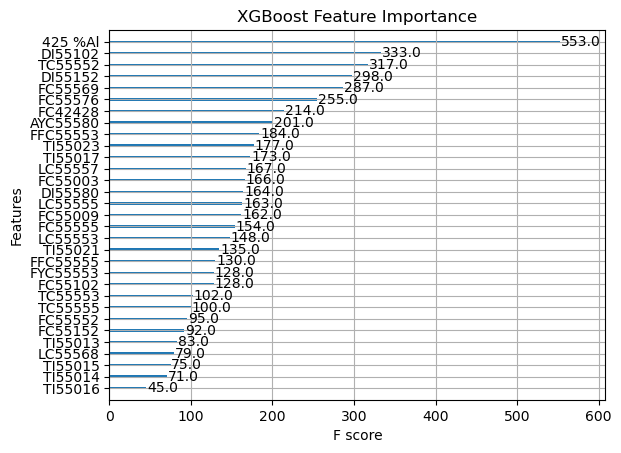

In [13]:
xgb.plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()


In [14]:

# Extract feature importances from the model
feature_importances = model.get_booster().get_score(importance_type="weight")

# Convert the dictionary to a DataFrame and sort by importance
df_importance = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)



df_importance.to_csv('FScore_on_Butanol_312.csv', index=False)

In [15]:
num_columns = df_importance.shape[0]
print("Number of rows:", num_columns)

Number of rows: 31


In [16]:
# Display the DataFrame
df_importance

,Feature,Importance
0,425 %Al,553.0
1,DI55102,333.0
3,TC55552,317.0
2,DI55152,298.0
4,FC55569,287.0
6,FC55576,255.0
7,FC42428,214.0
5,AYC55580,201.0
10,FFC55553,184.0
12,TI55023,177.0


In [17]:
# Extract the feature names you want to keep from df_importance
features_to_keep = df_importance['Feature'].tolist()

# Filter df_CDFS using these features
df_CDFS = df_CDFS[features_to_keep]

# Add back the excluded columns to df_CDFS
df_CDFS = pd.concat([y, df_CDFS, temp_exclude], axis=1)

In [18]:
# Extract feature importances from the model
feature_importances = model.get_booster().get_score(importance_type="weight")

# Convert the dictionary to a DataFrame and sort by importance
df_importance = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

# Capture all the feature names before filtering
all_features = set(df_importance['Feature'])

# Define a threshold for feature importance
threshold = 100  # Adjust this threshold as needed

# Prompt to remove columns with importance values below the threshold
print(f"Removing columns with importance values below {threshold}...")

# Filter the DataFrame to keep only columns with importance values above the threshold
df_importance = df_importance[df_importance['Importance'] >= threshold]

# Capture the feature names after filtering
remaining_features = set(df_importance['Feature'])

# Find the features that were dropped
dropped_features = all_features - remaining_features

# Print the dropped features
print(f"Columns dropped due to low importance: {', '.join(dropped_features)}")
print(f"Total number of columns dropped: {len(dropped_features)}")

# Save the filtered DataFrame to a CSV file
df_importance.to_csv('filtered_FScore_on_Butanol.csv', index=False)

print("Filtered data saved to 'filtered_FScore_on_Butanol.csv'")


Removing columns with importance values below 100...
Columns dropped due to low importance: FC55152, TI55014, LC55568, TI55013, FC55552, TI55016, TI55015
Total number of columns dropped: 7
Filtered data saved to 'filtered_FScore_on_Butanol.csv'


In [19]:
# Extract the feature names you want to keep from df_importance
features_to_keep = df_importance['Feature'].tolist()

# Filter df_CDFS using these features
df_CDFS = df_CDFS[features_to_keep]

# Add back the excluded columns to df_CDFS
df_CDFS = pd.concat([y, df_CDFS, temp_exclude], axis=1)

# REPLACE NECESSARY FEATURES

In [20]:
# Check if 'FFC55555' is missing in df_CDFS columns
if 'FFC55555' not in df_CDFS.columns:
    # Add the 'FFC55555' column from df_CDFS1 to df_CDFS
    df_CDFS['FFC55555'] = df_CDFS1['FFC55555']


In [21]:

# If you want to save df_CDFS to a .csv file:
df_CDFS.to_csv('df_CDFS.csv', index=False)

In [22]:
column_counts = df_CDFS1.columns.value_counts()
total_counts = column_counts.sum()
print(total_counts)

column_counts = df_CDFS.columns.value_counts()
total_counts = column_counts.sum()
print(total_counts)


34
27
